# Analyse exploratoire, traitements, modélisation des données

In [1]:
# import dependencies
import pandas as pd
import numpy as np
from skimpy import skim
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# options
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", lambda x: f"{x :.2f}")
warnings.filterwarnings('ignore')

In [3]:
# read csv
df = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.00,80.00,1.02,1.00,0.00,NaN,normal,notpresent,notpresent,121.00,36.00,1.20,NaN,NaN,15.40,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.00,50.00,1.02,4.00,0.00,NaN,normal,notpresent,notpresent,NaN,18.00,0.80,NaN,NaN,11.30,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.00,80.00,1.01,2.00,3.00,normal,normal,notpresent,notpresent,423.00,53.00,1.80,NaN,NaN,9.60,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.00,70.00,1.00,4.00,0.00,normal,abnormal,present,notpresent,117.00,56.00,3.80,111.00,2.50,11.20,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.00,80.00,1.01,2.00,0.00,normal,normal,notpresent,notpresent,106.00,26.00,1.40,NaN,NaN,11.60,35,7300,4.6,no,no,no,good,no,no,ckd


## 1 - Exploration des données

#### 1.1.1 - Nombre de données, visualisation des colonnes du dataset

In [4]:
df.shape

(400, 26)

In [5]:
# rename columns
df.columns = ['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'classification_str']
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,classification_str
0,0,48.00,80.00,1.02,1.00,0.00,NaN,normal,notpresent,notpresent,121.00,36.00,1.20,NaN,NaN,15.40,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.00,50.00,1.02,4.00,0.00,NaN,normal,notpresent,notpresent,NaN,18.00,0.80,NaN,NaN,11.30,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.00,80.00,1.01,2.00,3.00,normal,normal,notpresent,notpresent,423.00,53.00,1.80,NaN,NaN,9.60,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.00,70.00,1.00,4.00,0.00,normal,abnormal,present,notpresent,117.00,56.00,3.80,111.00,2.50,11.20,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.00,80.00,1.01,2.00,0.00,normal,normal,notpresent,notpresent,106.00,26.00,1.40,NaN,NaN,11.60,35,7300,4.6,no,no,no,good,no,no,ckd


#### 1.1.2 - Observation des types de données

In [6]:
df.info()
# there are some numeric columns that are stored as object
# i need to convert them to numeric
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

#### 1.1.3 - Observation des valeurs Null

In [7]:
# a lot of columns have null values
# will delete rows with more than 3 null values
# and fill the rest with median or means
df.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
classification_str           0
dtype: int64

### 1.2 - Observation des variables numériques

#### 1.2.1 - Analyse de la distribution

In [8]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols.remove('id')

In [9]:
# for better analyse of numerical distribution i avance some cleaning part of categorielles values here
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

classification_str has ['ckd' 'ckd\t' 'notckd'] values



In [10]:
# need to clean some values (like \tno to no)
df['classification_str'] = df['classification_str'].replace('ckd\t', 'ckd')
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace('\tno', 'no').replace('\tyes', 'yes')
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace('\tno', 'no').replace('\tyes', 'yes').replace(' yes','yes')

In [11]:
df['classification_int'] = df['classification_str'].map({'ckd': 1, 'notckd': 0})

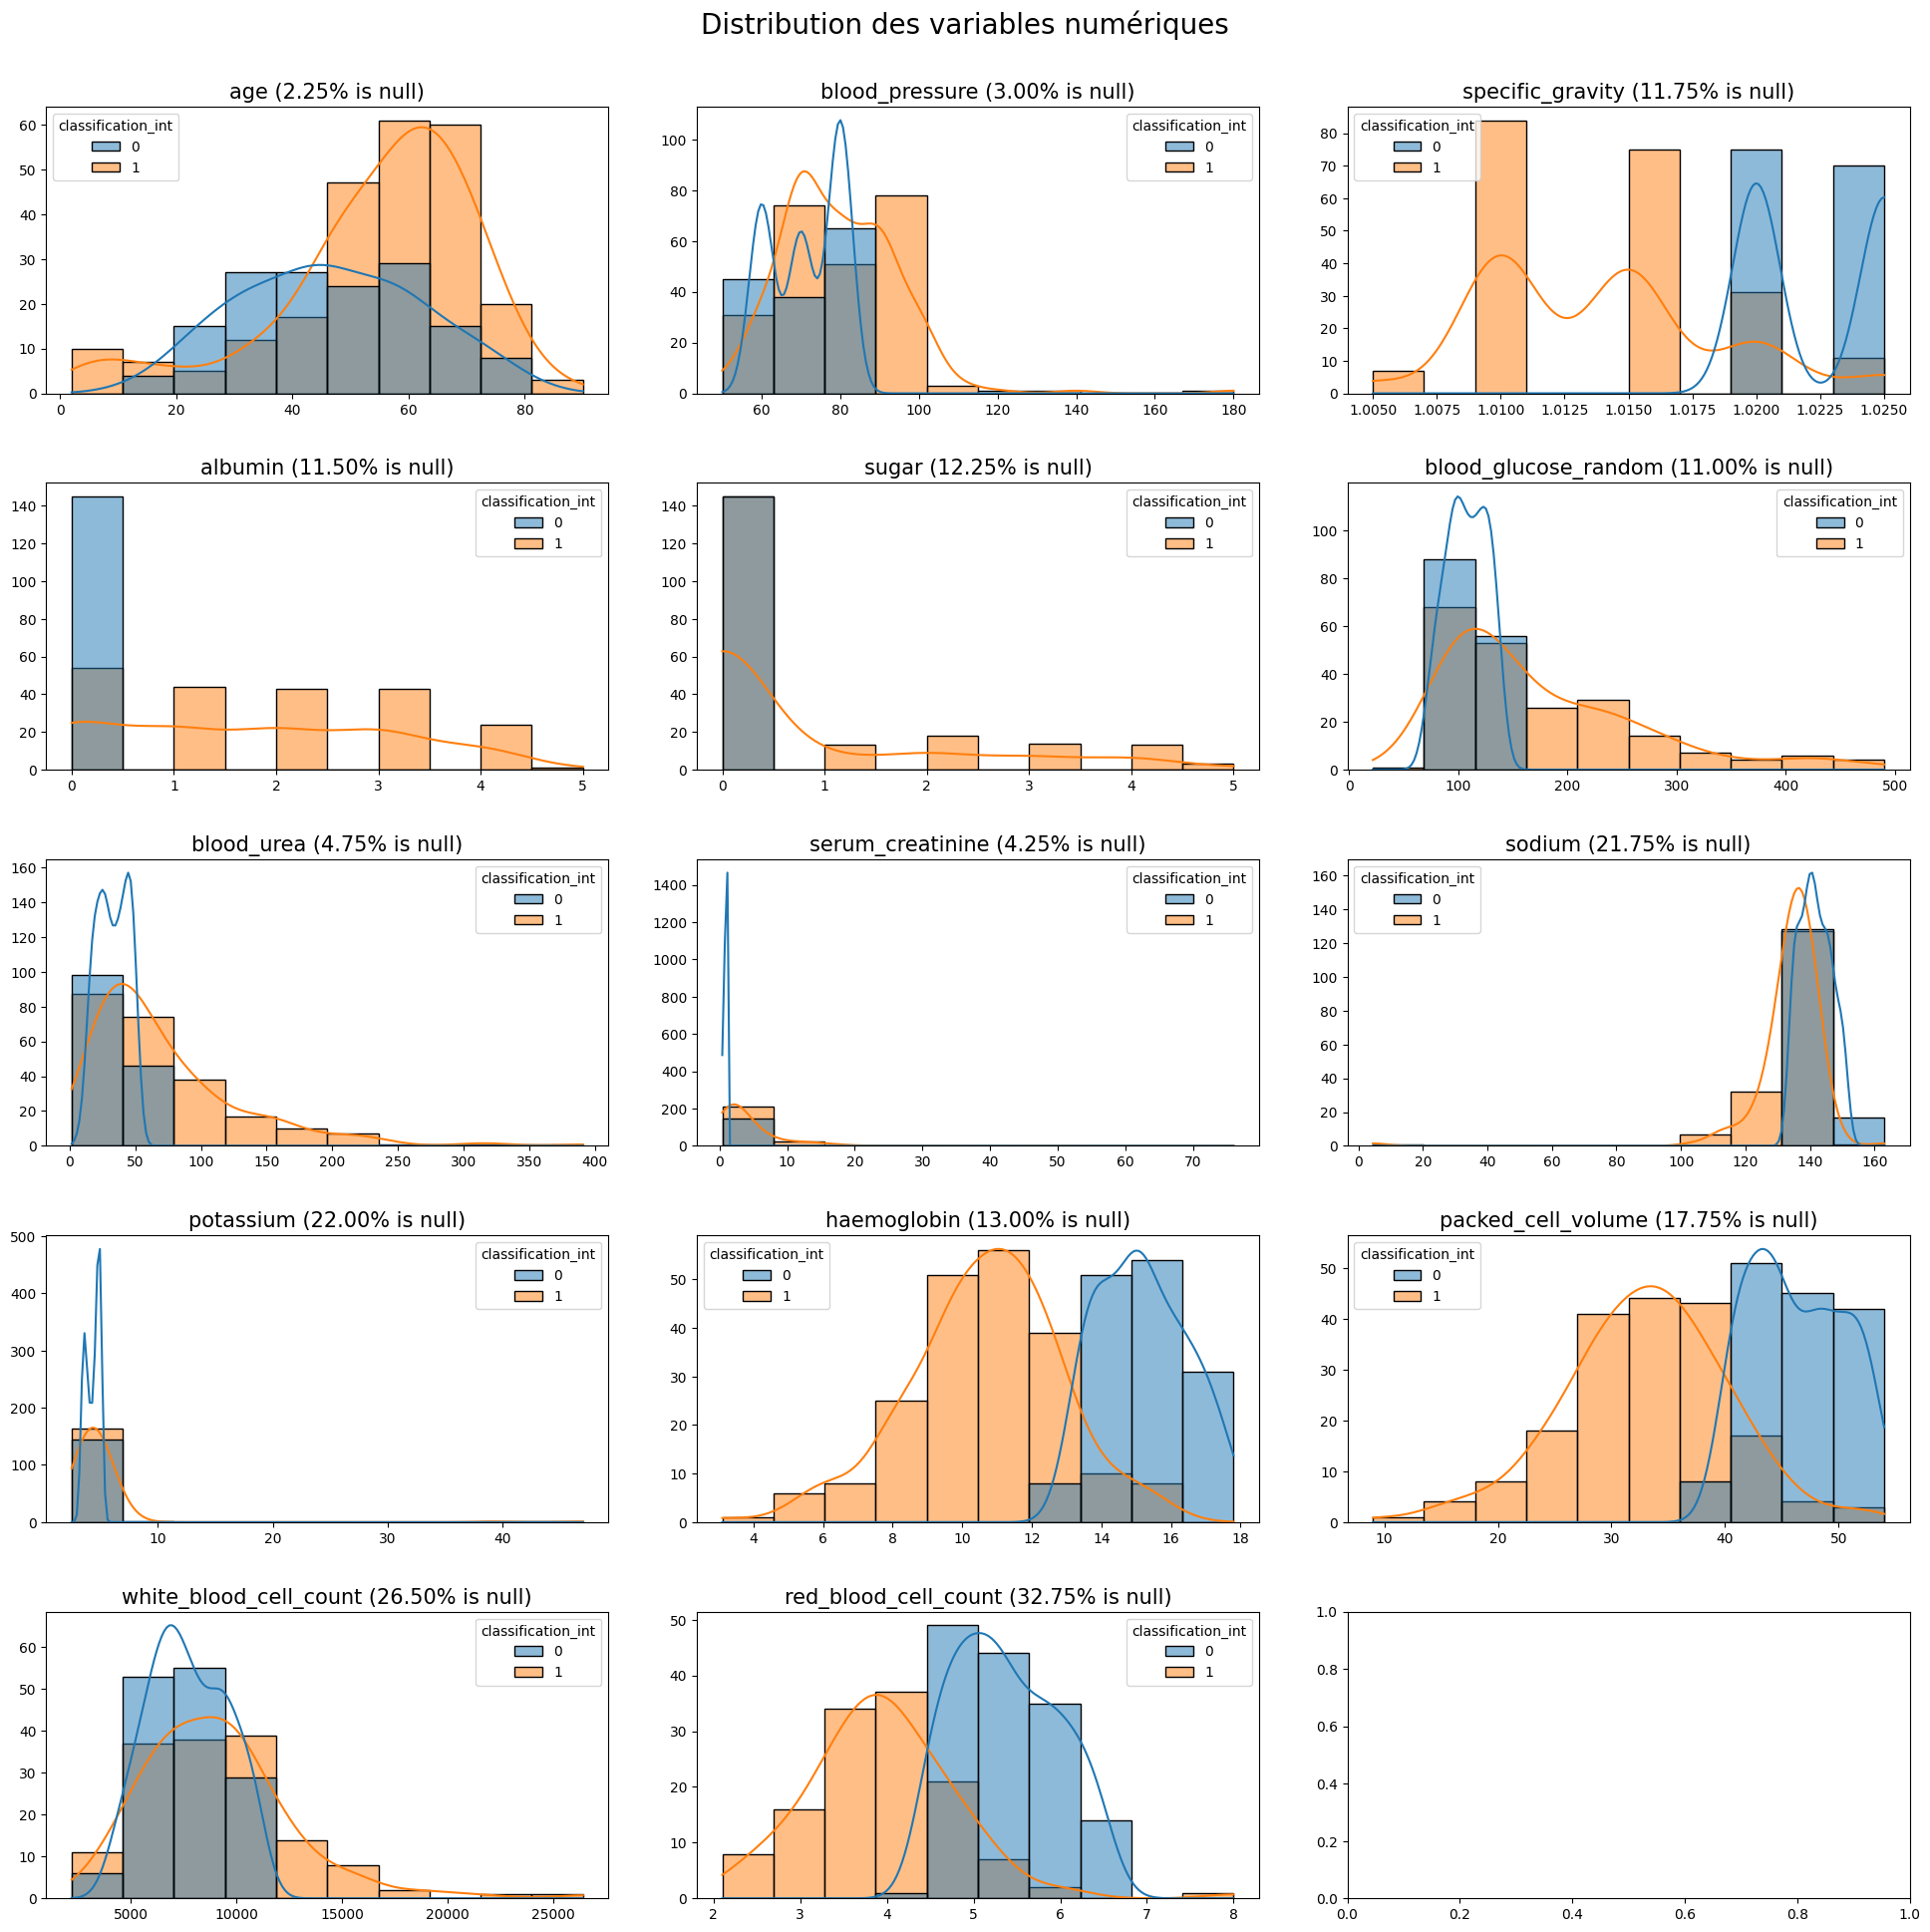

In [12]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
fig.suptitle('Distribution des variables numériques', fontsize=20)

# create graphs for numerical variables differents between 0 and 1 in classification_int
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, bins='sturges', kde=True, ax=axes[i//3, i%3], hue='classification_int')
    null_percentage = "%.2f" % (df[col].isnull().sum() / len(df[col]) * 100)
    label = f'{col} ({null_percentage}% is null)'
    axes[i//3, i%3].set_title(label, fontsize=15)    
    axes[i//3, i%3].set_xlabel('')  
    axes[i//3, i%3].set_ylabel('')  
plt.tight_layout(pad=3.0)  # Adjusted padding for better layout
plt.show()

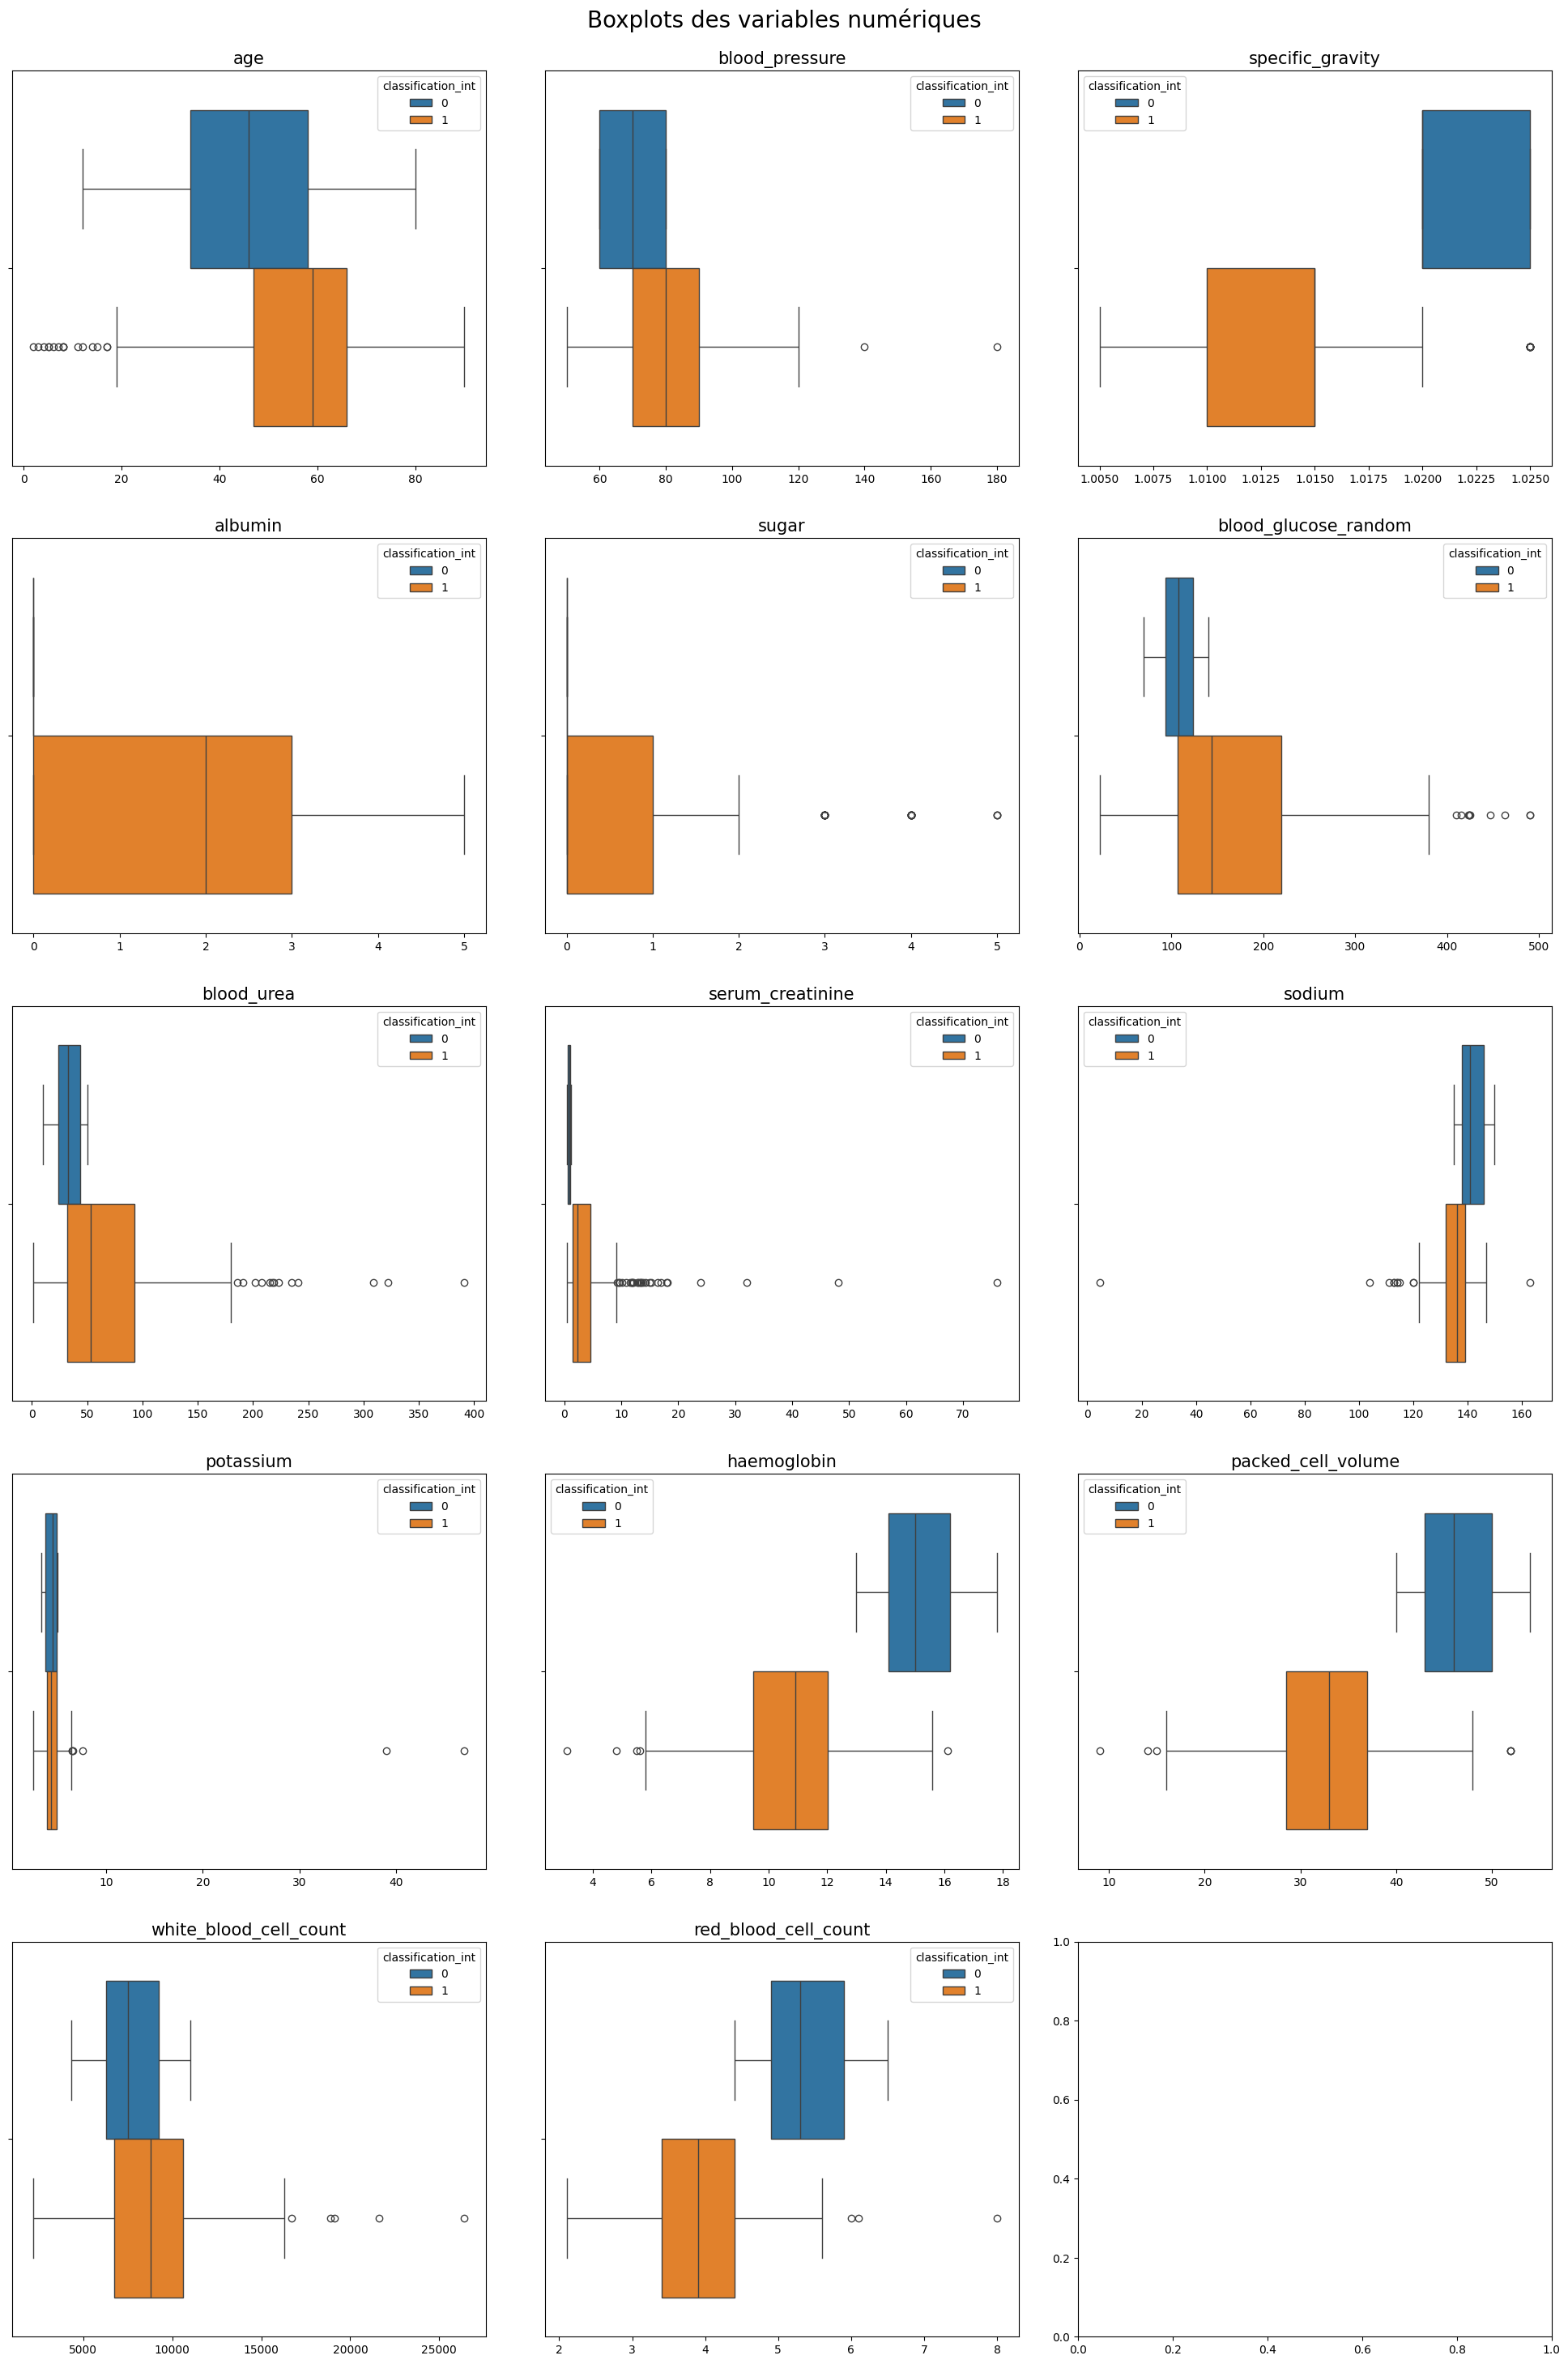

In [13]:
# Boxplots to check the distribution of the data
fig, axes = plt.subplots(5, 3, figsize=(20, 30))
fig.suptitle('Boxplots des variables numériques', fontsize=20)
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col,hue='classification_int', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col}', fontsize=15)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')
plt.tight_layout(pad=3.0)
plt.show()

In [14]:
# there abnormal high values in blood pressure
# albuminuria(albumin) should be around 30mg/g i got numbers from 0 to 5
# glucose level the same. Should be around 70-99 mg/dL but i have numbers from 0 t 5
# blood glucose random looks like 'normal' glucose measures. are they linked?
# blood urea has some really high outliers (everything above 50 to 75mg/l needs medical attention and indicates kidney damage ) 
# serum creatinine has some really high outliers (everything above 2 needs medical attention and indicates kidney damage ) 
# sodium has some low outliers
# potassium has some really high outliers (everything above 5 needs medical attention and indicates kidney damage )

#### 1.2.2 - Analyse statique descriptive de base

In [15]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 400    │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 27     │ │ string      │ 11    │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %   ┃ mean   ┃ sd       ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ id                    │    0 │      0 │  199.5 │    115.6 │     0 │ 99.75 │ 199.5 │ 299.2 │   399 │ ▇▇▇▇▇▇ │  │
│ │ age                   │    9 │   2.25 │  51.48 │    17.17 │     2 │    42 │    55 │  64.5 │    90 │ ▁▂▅▇▇▁ │  │
│ │ blood_pressure        │   12 │      3 │  76.47 │    13.68 │    50 │    70 │    80 │    80 │   180 │  ▇▇▁   │  │
│ │ specific_gravity      │   47 │  11.75 │  1.017 │ 0.005717 │ 1.005 │  1.01 │  1.02 │  1.02 │ 1.025 │ ▁▆ ▆▇▆ │  │
│ │ albumin               │   46 │   11.5 │  1.017 │    1.353 │     0 │     0 │     0 │     2 │     5 │ ▇▂▂▂▁  │  │
│ │ sugar                 │   49 │  12.25 │ 0.4501 │    1.099 │     0 │     0 │     0 │     0 │     5 │   ▇    │  │
│ │ blood_glucose_random  │   44 │     11 │    148 │    79.28 │    22 │    99 │   121 │   163 │   490 │  ▃▇▂▁  │  │
│ │ blood_urea            │   19 │   4.75 │  57.43 │     50.5 │   1.5 │    27 │    42 │    66 │   391 │  ▇▂▁   │  │
│ │ serum_creatinine      │   17 │   4.25 │  3.072 │    5.741 │   0.4 │   0.9 │   1.3 │   2.8 │    76 │   ▇    │  │
│ │ sodium                │   87 │  21.75 │  137.5 │    10.41 │   4.5 │   135 │   138 │   142 │   163 │     ▅▇ │  │
│ │ potassium             │   88 │     22 │  4.627 │    3.194 │   2.5 │   3.8 │   4.4 │   4.9 │    47 │   ▇    │  │
│ │ haemoglobin           │   52 │     13 │  12.53 │    2.913 │   3.1 │  10.3 │ 12.65 │    15 │  17.8 │  ▁▅▇▇▅ │  │
│ │ packed_cell_volume    │   71 │  17.75 │  38.88 │     8.99 │     9 │    32 │    40 │    45 │    54 │  ▁▅▅▇▅ │  │
│ │ white_blood_cell_coun │  106 │   26.5 │   8406 │     2944 │  2200 │  6500 │  8000 │  9800 │ 26400 │  ▃▇▂   │  │
│ │ t                     │      │        │        │          │       │       │       │       │       │        │  │
│ │ red_blood_cell_count  │  131 │  32.75 │  4.707 │    1.025 │   2.1 │   3.9 │   4.8 │   5.4 │     8 │ ▁▅▇▇▂  │  │
│ │ classification_int    │    0 │      0 │  0.625 │   0.4847 │     0 │     0 │     1 │     1 │     1 │ ▅    ▇ │  │
│ └───────────────────────┴──────┴────────┴────────┴──────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA      ┃ NA %       ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━

### 1.3 - Observation des variables catégoritielles

#### 1.3.1 - Analyse du nombre de valeurs unique

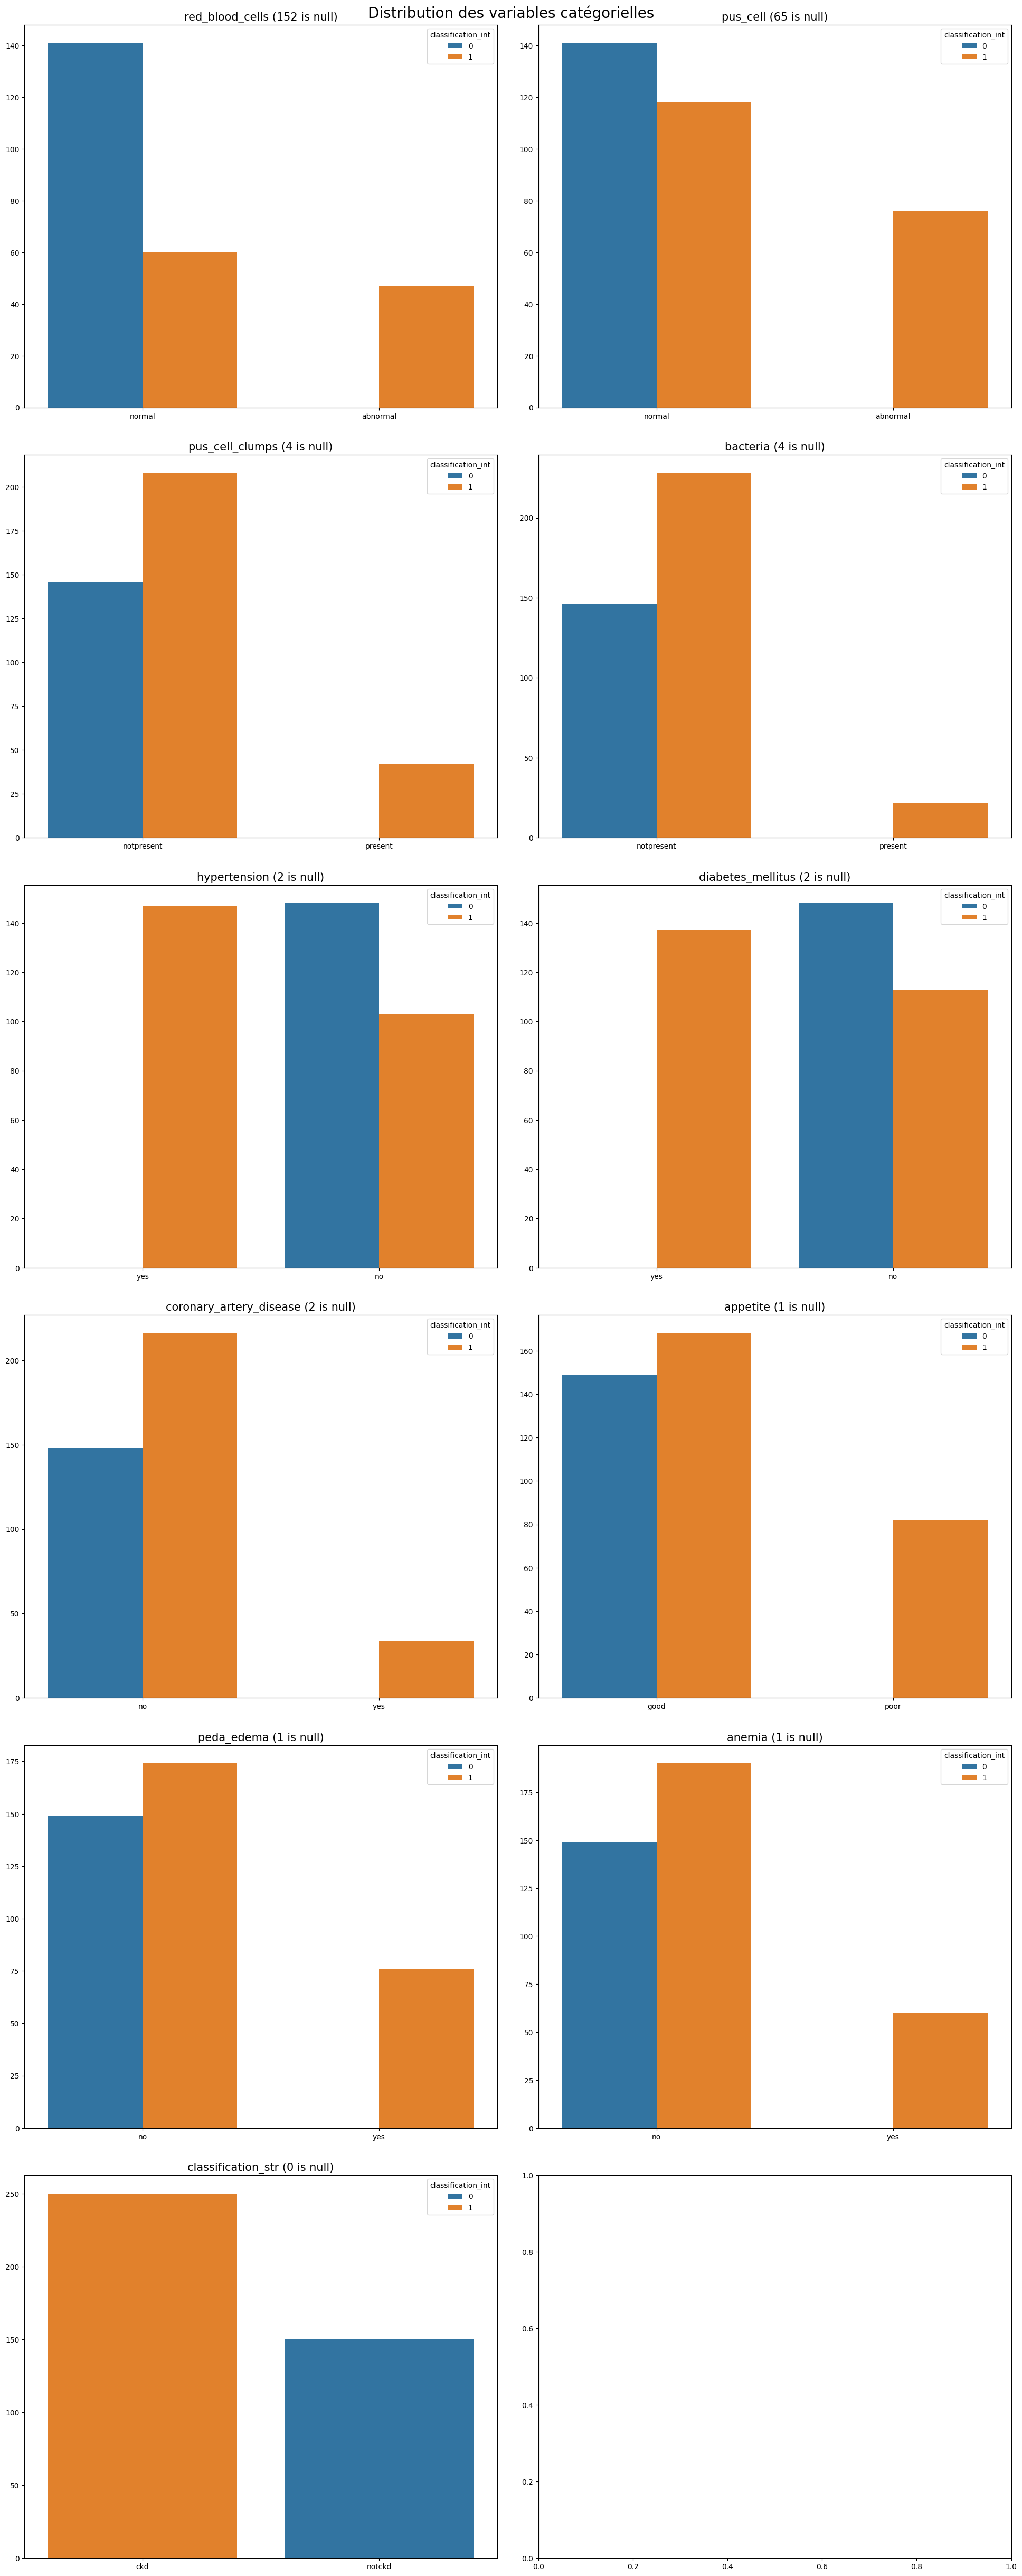

In [16]:
fig, axes = plt.subplots(6, 2, figsize=(20, 50))
fig.suptitle('Distribution des variables catégorielles', fontsize=20)
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i//2, i%2], hue='classification_int')
    label = f'{col} ({df[col].isnull().sum()} is null)'
    axes[i//2, i%2].set_title(label, fontsize=15)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
plt.tight_layout(pad=3.0)
plt.show()

#### 1.3.2 - Analyse des  statistique de base

## 2 - Nettoyage des données

In [17]:
# change 39.0 and 47.0 in potassium to 3.9 and 4.7
df.loc[df['potassium'] == 39.0, 'potassium'] = 3.9
df.loc[df['potassium'] == 47.0, 'potassium'] = 4.7

### 2.1 - Traitement des valeurs manquantes

In [18]:
# check rows if there +=3 NAN/NULL
rows = df[df.isnull().sum(axis = 1) > 3]
rows.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,classification_str,classification_int
1,1,7.00,50.00,1.02,4.00,0.00,NaN,normal,notpresent,notpresent,NaN,18.00,0.80,NaN,NaN,11.30,38.00,6000.00,NaN,no,no,no,good,no,no,ckd,1
10,10,50.00,60.00,1.01,2.00,4.00,NaN,abnormal,present,notpresent,490.00,55.00,4.00,NaN,NaN,9.40,28.00,NaN,NaN,yes,yes,no,good,no,yes,ckd,1
13,13,68.00,70.00,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,98.00,86.00,4.60,135.00,3.40,9.80,NaN,NaN,NaN,yes,yes,yes,poor,yes,no,ckd,1
16,16,47.00,70.00,1.01,2.00,0.00,NaN,normal,notpresent,notpresent,99.00,46.00,2.20,138.00,4.10,12.60,NaN,NaN,NaN,no,no,no,good,no,no,ckd,1
17,17,47.00,80.00,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.00,87.00,5.20,139.00,3.70,12.10,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd,1


In [19]:
# we have 41% of the rows in 0ataset with more
rows_nan_percentage = "%.2f" %(len(df[df.isnull().sum(axis = 1) > 3]) / len(df) * 100)
print(rows_nan_percentage)

31.75


In [20]:
# delete rows with more then 3 NaN
df = df[df.isnull().sum(axis = 1) <= 3]
df.shape

(273, 27)

In [21]:
df.isnull().sum()

id                          0
age                         3
blood_pressure              4
specific_gravity            2
albumin                     1
sugar                       1
red_blood_cells            58
pus_cell                   12
pus_cell_clumps             3
bacteria                    3
blood_glucose_random       11
blood_urea                  5
serum_creatinine            3
sodium                     26
potassium                  26
haemoglobin                 5
packed_cell_volume          4
white_blood_cell_count     18
red_blood_cell_count       28
hypertension                2
diabetes_mellitus           2
coronary_artery_disease     2
appetite                    1
peda_edema                  1
anemia                      1
classification_str          0
classification_int          0
dtype: int64

In [22]:
# filling Nan starting from bottom to top
# I take mode for categorical variables
df['anemia'] = df['anemia'].fillna(df['anemia'].mode()[0])
df['peda_edema'] = df['peda_edema'].fillna(df['peda_edema'].mode()[0])
df['appetite'] = df['appetite'].fillna(df['appetite'].mode()[0])

In [23]:
df['coronary_artery_disease'] = df['coronary_artery_disease'].fillna(df['coronary_artery_disease'].mode()[0])
df['diabetes_mellitus'] = df['diabetes_mellitus'].fillna(df['diabetes_mellitus'].mode()[0])
df['hypertension'] = df['hypertension'].fillna(df['hypertension'].mode()[0])

In [24]:
df['bacteria'] = df['bacteria'].fillna(df['bacteria'].mode()[0])
df['pus_cell_clumps'] = df['pus_cell_clumps'].fillna(df['pus_cell_clumps'].mode()[0])
df['pus_cell'] = df['pus_cell'].fillna(df['pus_cell'].mode()[0])
df['red_blood_cells'] = df['red_blood_cells'].fillna(df['red_blood_cells'].mode()[0])

In [25]:
# red_blood_cell_count 0 median, 1 mean
# Calculate median for 'classification_int' == 0
median_value = df.loc[df['classification_int'] == 0, 'red_blood_cell_count'].median()
# Fill NaN values for 'classification_int' == 0
df.loc[df['classification_int'] == 0, 'red_blood_cell_count'] = df.loc[df['classification_int'] == 0, 'red_blood_cell_count'].fillna(median_value)

# Calculate mean for 'classification_int' == 1
mean_value = df.loc[df['classification_int'] == 1, 'red_blood_cell_count'].mean()
# Fill NaN values for 'classification_int' == 1
df.loc[df['classification_int'] == 1, 'red_blood_cell_count'] = df.loc[df['classification_int'] == 1, 'red_blood_cell_count'].fillna(mean_value)

In [26]:
# white_blood_cell_count 0 mean, 1 median
# Calculate mean for 'classification_int' == 0
mean_value = df.loc[df['classification_int'] == 0, 'white_blood_cell_count'].mean()
# Fill NaN values for 'classification_int' == 0
df.loc[df['classification_int'] == 0, 'white_blood_cell_count'] = df.loc[df['classification_int'] == 0, 'white_blood_cell_count'].fillna(mean_value)

# Calculate median for 'classification_int' == 1
median_value = df.loc[df['classification_int'] == 1, 'white_blood_cell_count'].median()
# Fill NaN values for 'classification_int' == 1
df.loc[df['classification_int'] == 1, 'white_blood_cell_count'] = df.loc[df['classification_int'] == 1, 'white_blood_cell_count'].fillna(median_value)

In [27]:
# packed_cell_volume 0 median, 1 mean
# Calculate median for 'classification_int' == 0
median_value = df.loc[df['classification_int'] == 0, 'packed_cell_volume'].median()
# Fill NaN values for 'classification_int' == 0
df.loc[df['classification_int'] == 0, 'packed_cell_volume'] = df.loc[df['classification_int'] == 0, 'packed_cell_volume'].fillna(median_value)

# Calculate mean for 'classification_int' == 1
mean_value = df.loc[df['classification_int'] == 1, 'packed_cell_volume'].mean()
# Fill NaN values for 'classification_int' == 1
df.loc[df['classification_int'] == 1, 'packed_cell_volume'] = df.loc[df['classification_int'] == 1, 'packed_cell_volume'].fillna(mean_value)

In [28]:
# haemoglobin 0 median, 1 mean
# Calculate median for 'classification_int' == 0
median_value = df.loc[df['classification_int'] == 0, 'haemoglobin'].median()
# Fill NaN values for 'classification_int' == 0
df.loc[df['classification_int'] == 0, 'haemoglobin'] = df.loc[df['classification_int'] == 0, 'haemoglobin'].fillna(median_value)

# Calculate mean for 'classification_int' == 1
mean_value = df.loc[df['classification_int'] == 1, 'haemoglobin'].mean()
# Fill NaN values for 'classification_int' == 1
df.loc[df['classification_int'] == 1, 'haemoglobin'] = df.loc[df['classification_int'] == 1, 'haemoglobin'].fillna(mean_value)

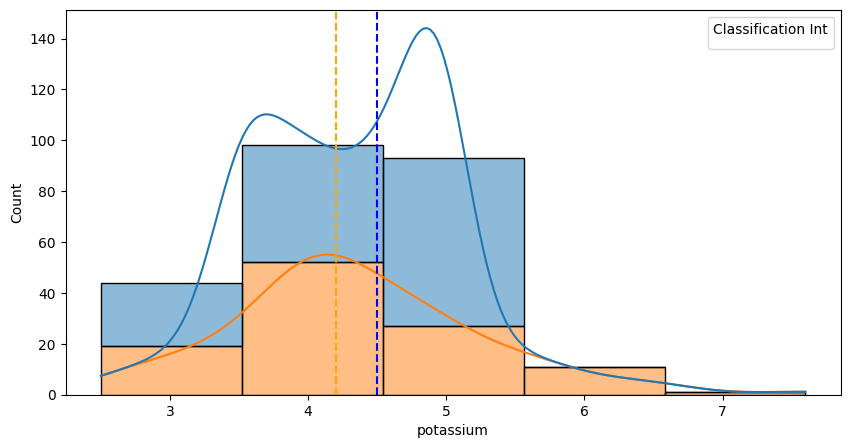

In [29]:
# need another graph for more insight
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(data=df, x='potassium', kde=True, hue='classification_int', multiple='stack', binwidth=1)
plt.legend(title='Classification Int')
# Add vertical lines for mean or median
plt.axvline(x=df[df['classification_int'] == 0]['potassium'].median(), color='blue', linestyle='--', label='Mean for 0')
plt.axvline(x=df[df['classification_int'] == 1]['potassium'].median(), color='orange', linestyle='--', label='Mean for 1')
plt.show()

In [30]:
# potassium 0 mean, 1 median
# Calculate mean for 'classification_int' == 0
mean_value = df.loc[df['classification_int'] == 0, 'potassium'].mean()
# Fill NaN values for 'classification_int' == 0
df.loc[df['classification_int'] == 0, 'potassium'] = df.loc[df['classification_int'] == 0, 'potassium'].fillna(mean_value)
# Calculate median for 'classification_int' == 1
median_value = df.loc[df['classification_int'] == 1, 'potassium'].median()
# Fill NaN values for 'classification_int' == 1
df.loc[df['classification_int'] == 1, 'potassium'] = df.loc[df['classification_int'] == 1, 'potassium'].fillna(median_value)

In [31]:
# sodium 0 mean, 1 median
# Calculate mean for 'classification_int' == 0
mean_value = df.loc[df['classification_int'] == 0, 'sodium'].mean()
# Fill NaN values for 'classification_int' == 0
df.loc[df['classification_int'] == 0, 'sodium'] = df.loc[df['classification_int'] == 0, 'sodium'].fillna(mean_value)
# Calculate median for 'classification_int' == 1
median_value = df.loc[df['classification_int'] == 1, 'sodium'].median()
# Fill NaN values for 'classification_int' == 1
df.loc[df['classification_int'] == 1, 'sodium'] = df.loc[df['classification_int'] == 1, 'sodium'].fillna(median_value)

In [32]:
# serum_creatinine 0 median, 1 median
# Calculate mean for 'classification_int' == 0
mean_value = df.loc[df['classification_int'] == 0, 'serum_creatinine'].median()
# Fill NaN values for 'classification_int' == 0
df.loc[df['classification_int'] == 0, 'serum_creatinine'] = df.loc[df['classification_int'] == 0, 'serum_creatinine'].fillna(mean_value)
# Calculate median for 'classification_int' == 1
median_value = df.loc[df['classification_int'] == 1, 'sodium'].median()
# Fill NaN values for 'classification_int' == 1
df.loc[df['classification_int'] == 1, 'serum_creatinine'] = df.loc[df['classification_int'] == 1, 'serum_creatinine'].fillna(median_value)

In [33]:
# blood_urea 0 mean, 1 median
# Calculate mean for 'classification_int' == 0
mean_value = df.loc[df['classification_int'] == 0, 'blood_urea'].mean()
# Fill NaN values for 'classification_int' == 0
df.loc[df['classification_int'] == 0, 'blood_urea'] = df.loc[df['classification_int'] == 0, 'blood_urea'].fillna(mean_value)
# Calculate median for 'classification_int' == 1
median_value = df.loc[df['classification_int'] == 1, 'blood_urea'].median()
# Fill NaN values for 'classification_int' == 1
df.loc[df['classification_int'] == 1, 'blood_urea'] = df.loc[df['classification_int'] == 1, 'blood_urea'].fillna(median_value)

In [34]:
# blood_glucose_random 0 mean, 1 median
# Calculate mean for 'classification_int' == 0
mean_value = df.loc[df['classification_int'] == 0, 'blood_glucose_random'].mean()
# Fill NaN values for 'classification_int' == 0
df.loc[df['classification_int'] == 0, 'blood_glucose_random'] = df.loc[df['classification_int'] == 0, 'blood_glucose_random'].fillna(mean_value)
# Calculate median for 'classification_int' == 1
median_value = df.loc[df['classification_int'] == 1, 'blood_glucose_random'].median()
# Fill NaN values for 'classification_int' == 1
df.loc[df['classification_int'] == 1, 'blood_glucose_random'] = df.loc[df['classification_int'] == 1, 'blood_glucose_random'].fillna(median_value)

In [35]:
# sugar and albumin fillna with 0
df['sugar'] = df['sugar'].fillna(0.0)
df['albumin'] = df['albumin'].fillna(0.0)

In [36]:
# specific_gravity 0 median, 11 median
# Calculate median for 'classification_int' == 0
median_value = df.loc[df['classification_int'] == 0, 'specific_gravity'].median()
# Fill NaN values for 'classification_int' == 0
df.loc[df['classification_int'] == 0, 'specific_gravity'] = df.loc[df['classification_int'] == 0, 'specific_gravity'].fillna(median_value)
# Calculate median for 'classification_int' == 1
median_value = df.loc[df['classification_int'] == 1, 'specific_gravity'].median()
# Fill NaN values for 'classification_int' == 1
df.loc[df['classification_int'] == 1, 'specific_gravity'] = df.loc[df['classification_int'] == 1, 'specific_gravity'].fillna(median_value)

In [37]:
# blood_pressure 0 median, 1 median
# Calculate median for 'classification_int' == 0
median_value = df.loc[df['classification_int'] == 0, 'blood_pressure'].median()
# Fill NaN values for 'classification_int' == 0
df.loc[df['classification_int'] == 0, 'blood_pressure'] = df.loc[df['classification_int'] == 0, 'blood_pressure'].fillna(median_value)
# Calculate median for 'classification_int' == 1
median_value = df.loc[df['classification_int'] == 1, 'blood_pressure'].median()
# Fill NaN values for 'classification_int' == 1
df.loc[df['classification_int'] == 1, 'blood_pressure'] = df.loc[df['classification_int'] == 1, 'blood_pressure'].fillna(median_value)

In [38]:
# age 0 mean 1 median
# Calculate mean for 'classification_int' == 0
mean_value = df.loc[df['classification_int'] == 0, 'age'].mean()
# Fill NaN values for 'classification_int' == 0
df.loc[df['classification_int'] == 0, 'age'] = df.loc[df['classification_int'] == 0, 'age'].fillna(mean_value)
# Calculate median for 'classification_int' == 1
median_value = df.loc[df['classification_int'] == 1, 'age'].median()
# Fill NaN values for 'classification_int' == 1
df.loc[df['classification_int'] == 1, 'age'] = df.loc[df['classification_int'] == 1, 'age'].fillna(median_value)

In [39]:
nan_val = df[df['specific_gravity'].isnull()]
nan_val

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,classification_str,classification_int


In [40]:
df.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
classification_str         0
classification_int         0
dtype: int64

### 2.2 - Traitement des doublons

In [41]:
# check for duplicates
df['id'].duplicated().sum()

0

In [42]:
# if duplicates, show them
#df[df['id'].isin(df['id'][df['id'].duplicated()])].sort_values("id")

### 2.3 - Traitement des valeurs abérantes

## 3 - EDA, analyse statistique univariée et multivariée, Visualisation des données


In [43]:
# Calculate correlation between 'sugar' and 'blood_glucose_random'
correlation = df['sugar'].corr(df['blood_glucose_random'])
print("Correlation between sugar and blood_glucose_random is:", correlation)

Correlation between sugar and blood_glucose_random is: 0.743373450274191


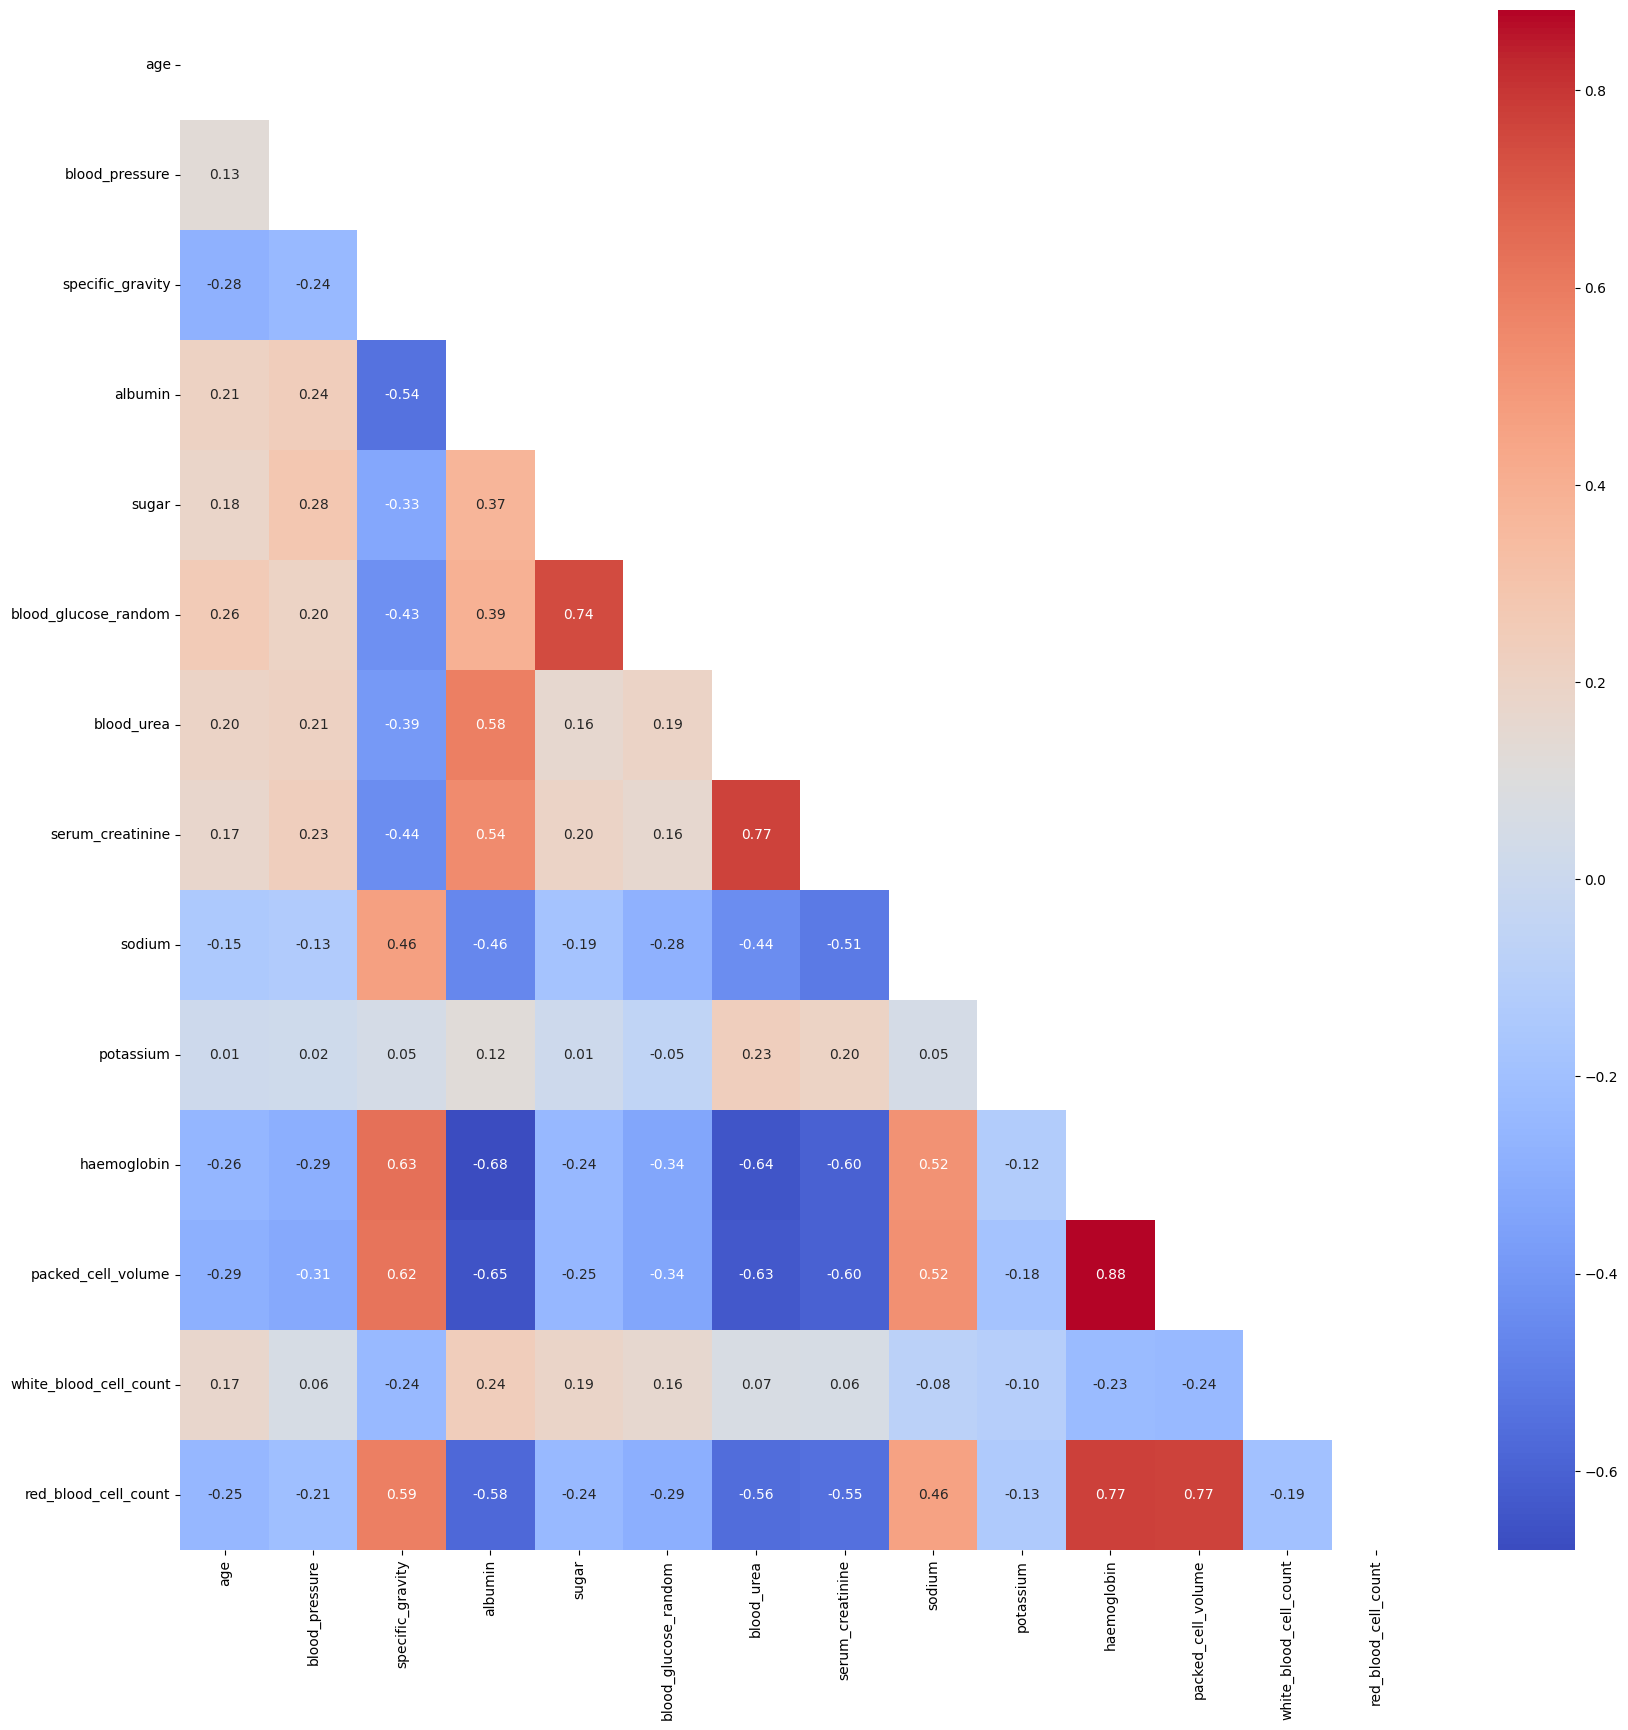

In [44]:
# heatmap
mask = np.triu(df[num_cols].corr())
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.show()

## 4 - Modélisation